In [742]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

In [743]:
Leads = pd.read_csv("E:/Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [744]:
Leads.shape

(9240, 37)

In [745]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [746]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Checking duplicates

In [747]:
sum(Leads.duplicated(subset = 'Prospect ID')) == 0

True

In [748]:
sum(Leads.duplicated(subset = 'Lead Number')) == 0

True

In [749]:
## There are no duplicates in prospect id and lead number ,as they are just contact numbers can be dropped

In [750]:
Lead_Number = Leads['Lead Number']
#using lead number at the end 

## Data Cleaning:

In [751]:
Leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [752]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Leads = Leads.replace('select',np.nan)

In [753]:
Leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [754]:
round(100*Leads.isna().sum()/len(Leads),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [755]:
cols = Leads.columns

for i in cols:
    if((100*Leads[i].isnull().sum()/len(Leads.index)) >= 40):
        Leads.drop(i, axis = 1, inplace = True)

In [756]:
round(100*Leads.isna().sum()/len(Leads),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [757]:
Leads['Lead Profile'] = Leads['Lead Profile'].fillna('not specified')
Leads['City'] = Leads['City'].fillna('not specified')
Leads['Tags'] = Leads['Tags'].fillna('not specified')
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].fillna('not specified')
Leads['What is your current occupation'] = Leads['What is your current occupation'].fillna('not specified')
Leads['Country'] = Leads['Country'].fillna('not specified')
Leads['Specialization'] = Leads['Specialization'].fillna('not specified')
Leads['How did you hear about X Education'] = Leads['How did you hear about X Education'].fillna('not specified')
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [758]:
round(100*Leads.isna().sum()/len(Leads),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [759]:
Leads.shape

(9240, 30)

In [760]:
Leads['City'].value_counts()

Mumbai                         3222
Select                         2249
not specified                  1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [761]:
Leads['Country'].value_counts()

India                   6492
not specified           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [762]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not specified":
        category = "Not specified"
    else:
        category = "Out of India"
    return category

Leads['Country'] = Leads.apply(lambda x:slots(x['Country']), axis = 1)
Leads['Country'].value_counts()

India            6492
Not specified    2461
Out of India      287
Name: Country, dtype: int64

In [763]:
round(100*Leads.isna().sum()/len(Leads),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [764]:
round(100*(sum(Leads.isnull().sum(axis=1) > 1)/Leads.shape[0]),2)

1.48

In [765]:
Leads1 = Leads[Leads.isnull().sum(axis=1) <1]

In [766]:
round(100*Leads1.isna().sum()/len(Leads1),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [767]:
Leads1.shape

(9074, 30)

## univariant analysis

In [768]:
Leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

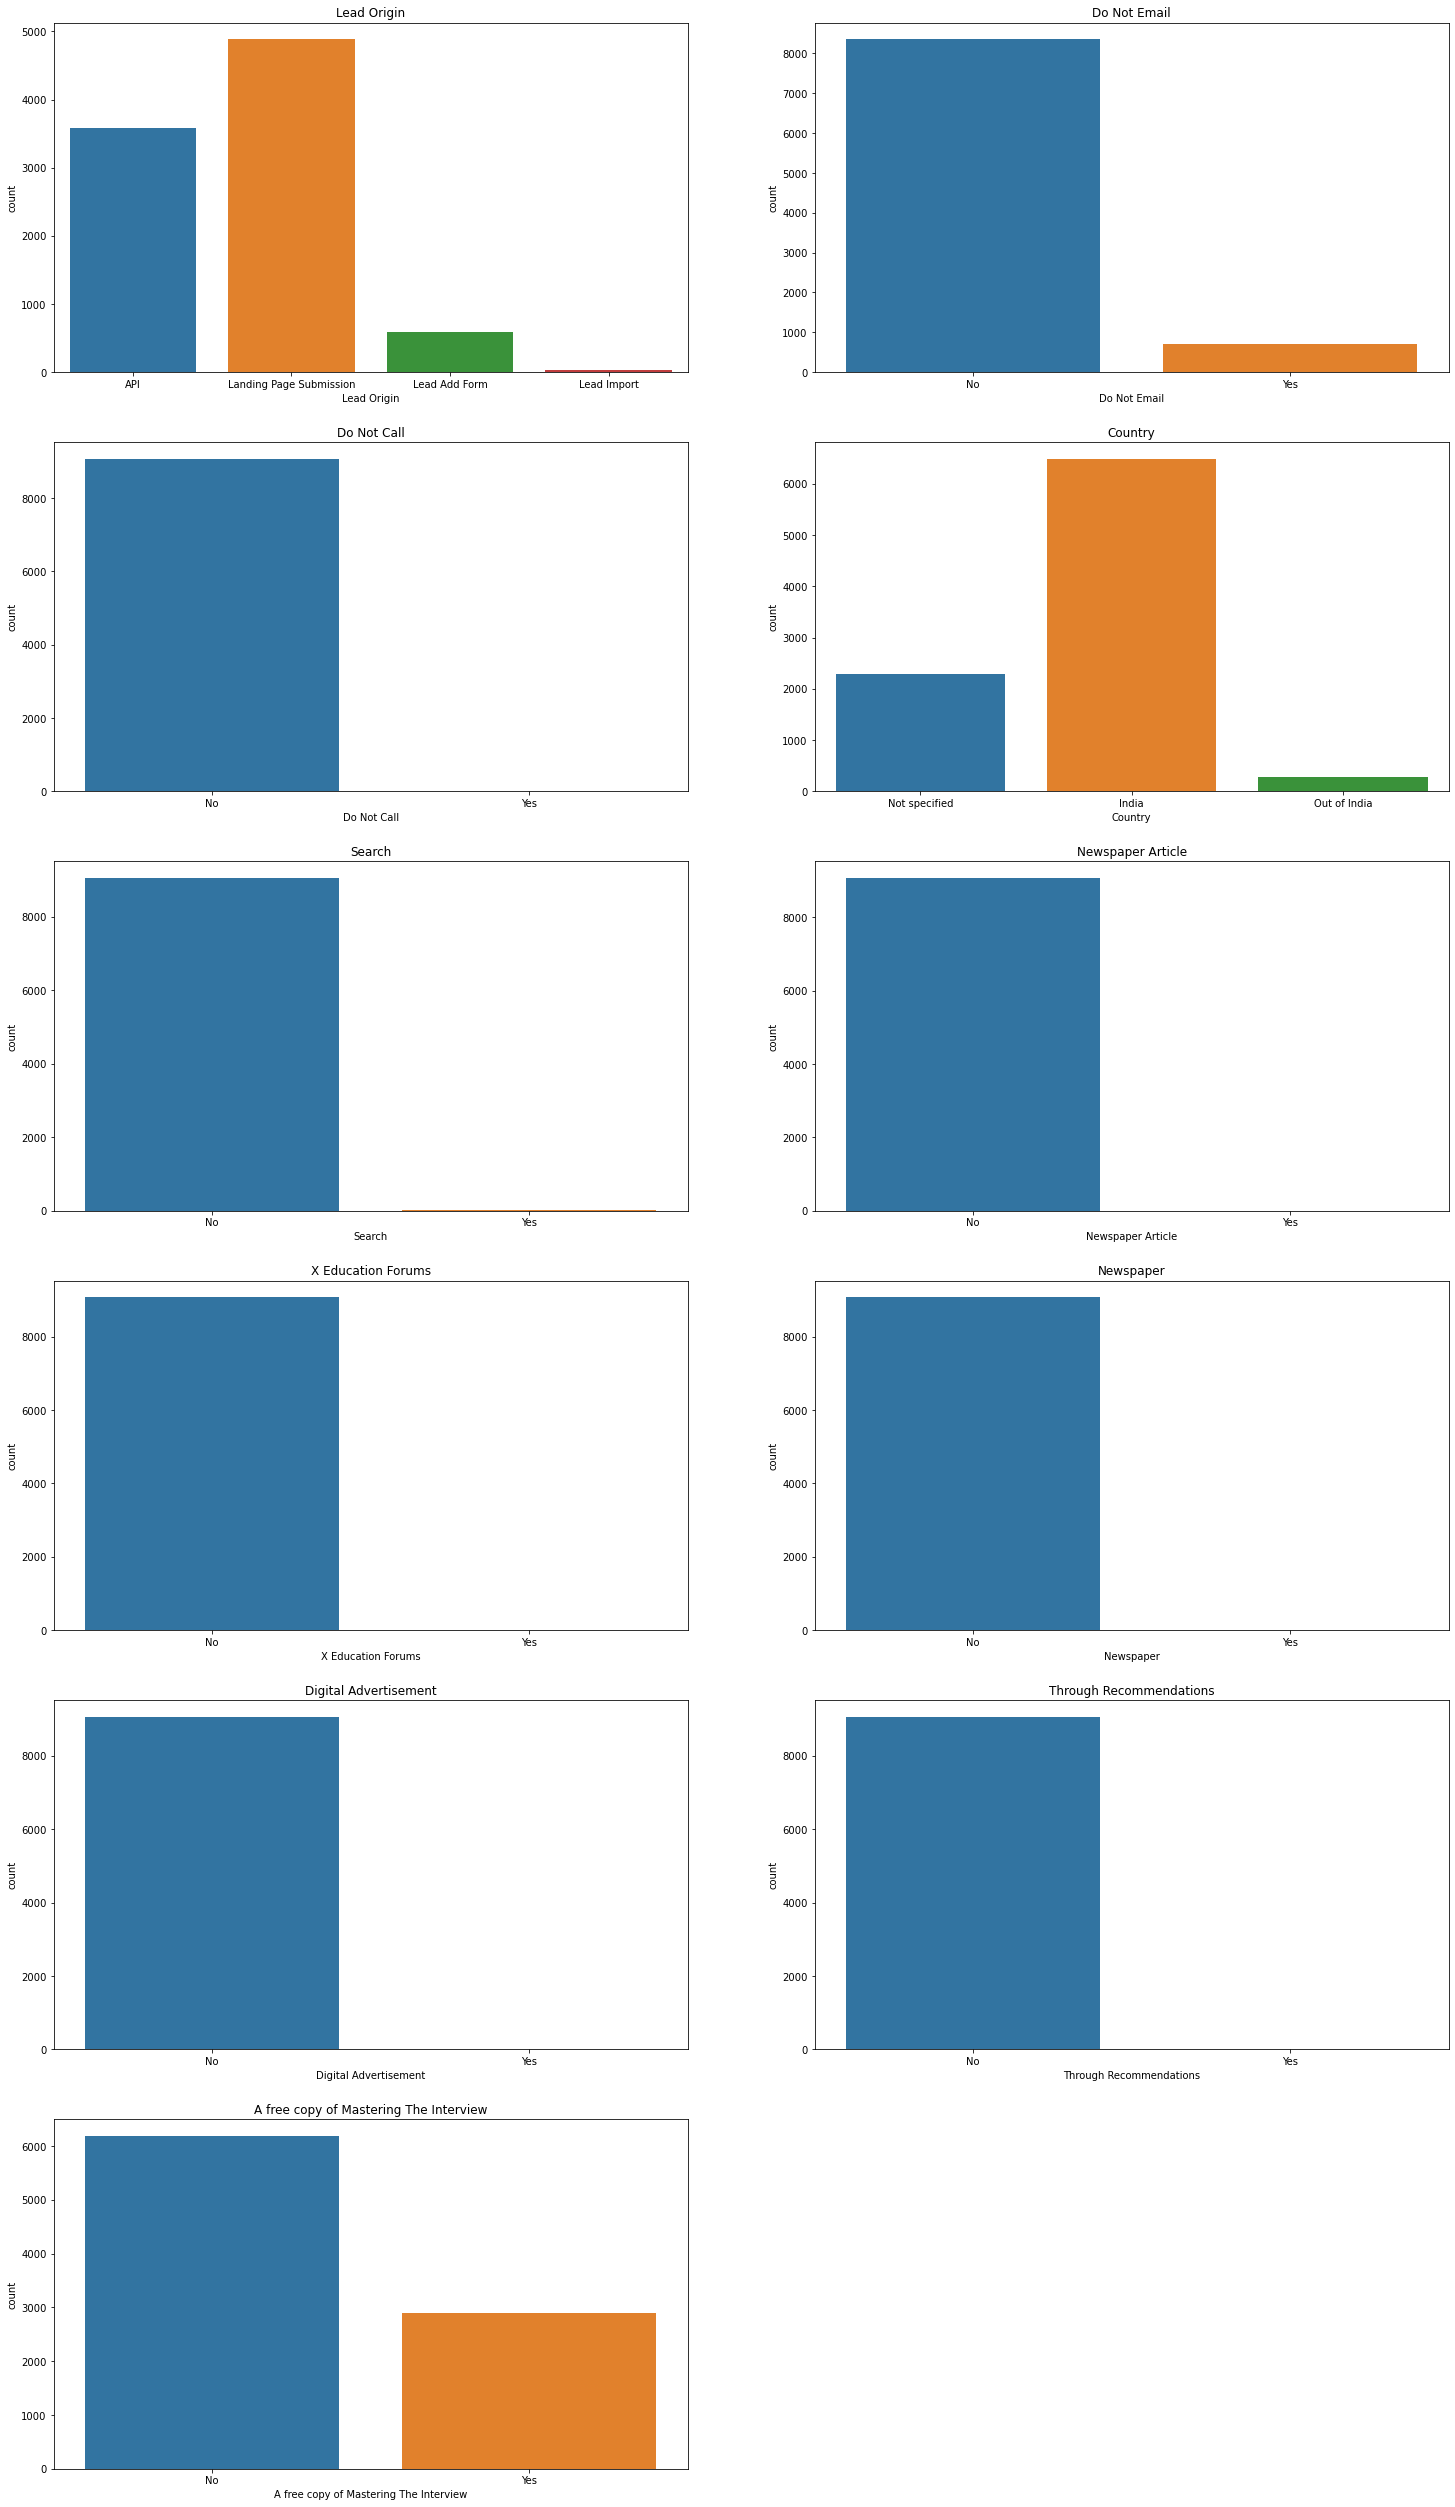

In [769]:
plt.figure(figsize = (25,45))

plt.subplot(6,2,1)
sns.countplot(Leads1['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Leads1['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Leads1['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Leads1['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Leads1['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(Leads1['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Leads1['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Leads1['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Leads1['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Leads1['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Leads1['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.show()

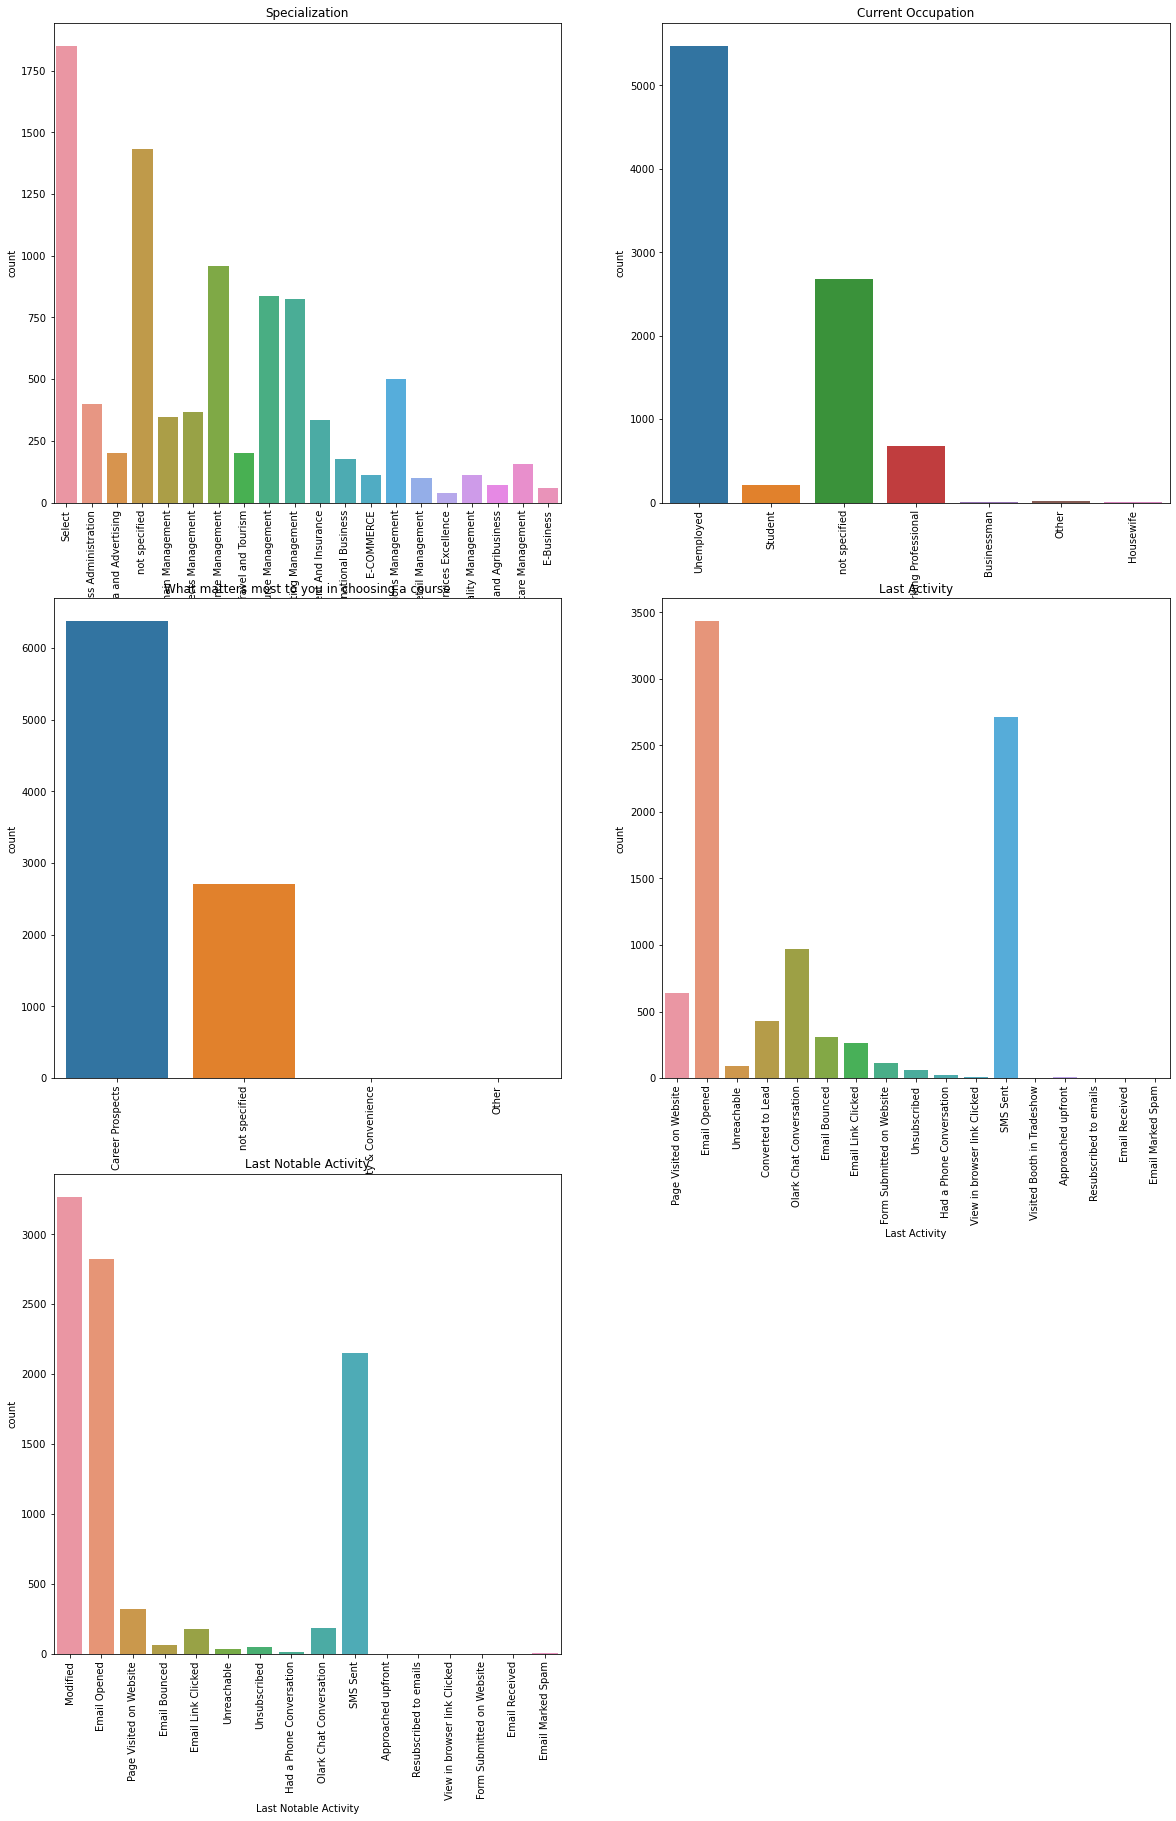

In [770]:
plt.figure(figsize = (20,30))
plt.subplot(3,2,1)
sns.countplot(Leads1['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(3,2,2)
sns.countplot(Leads1['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(3,2,3)
sns.countplot(Leads1['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(3,2,4)
sns.countplot(Leads1['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(3,2,5)
sns.countplot(Leads1['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

In [771]:
Leads1['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [772]:
# percentage of converted values
sum(Leads1['Converted'])/len(Leads1['Converted'])*100

37.85541106458012

## Numerical variables

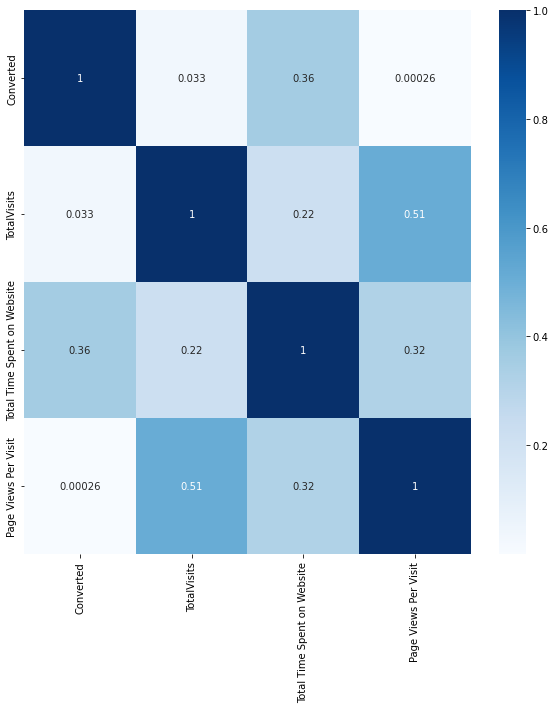

In [773]:
plt.figure(figsize = (10,10))
sns.heatmap(Leads1.corr(), annot = True, cmap= 'Blues')
plt.show()

## Relating catogorical vth converted

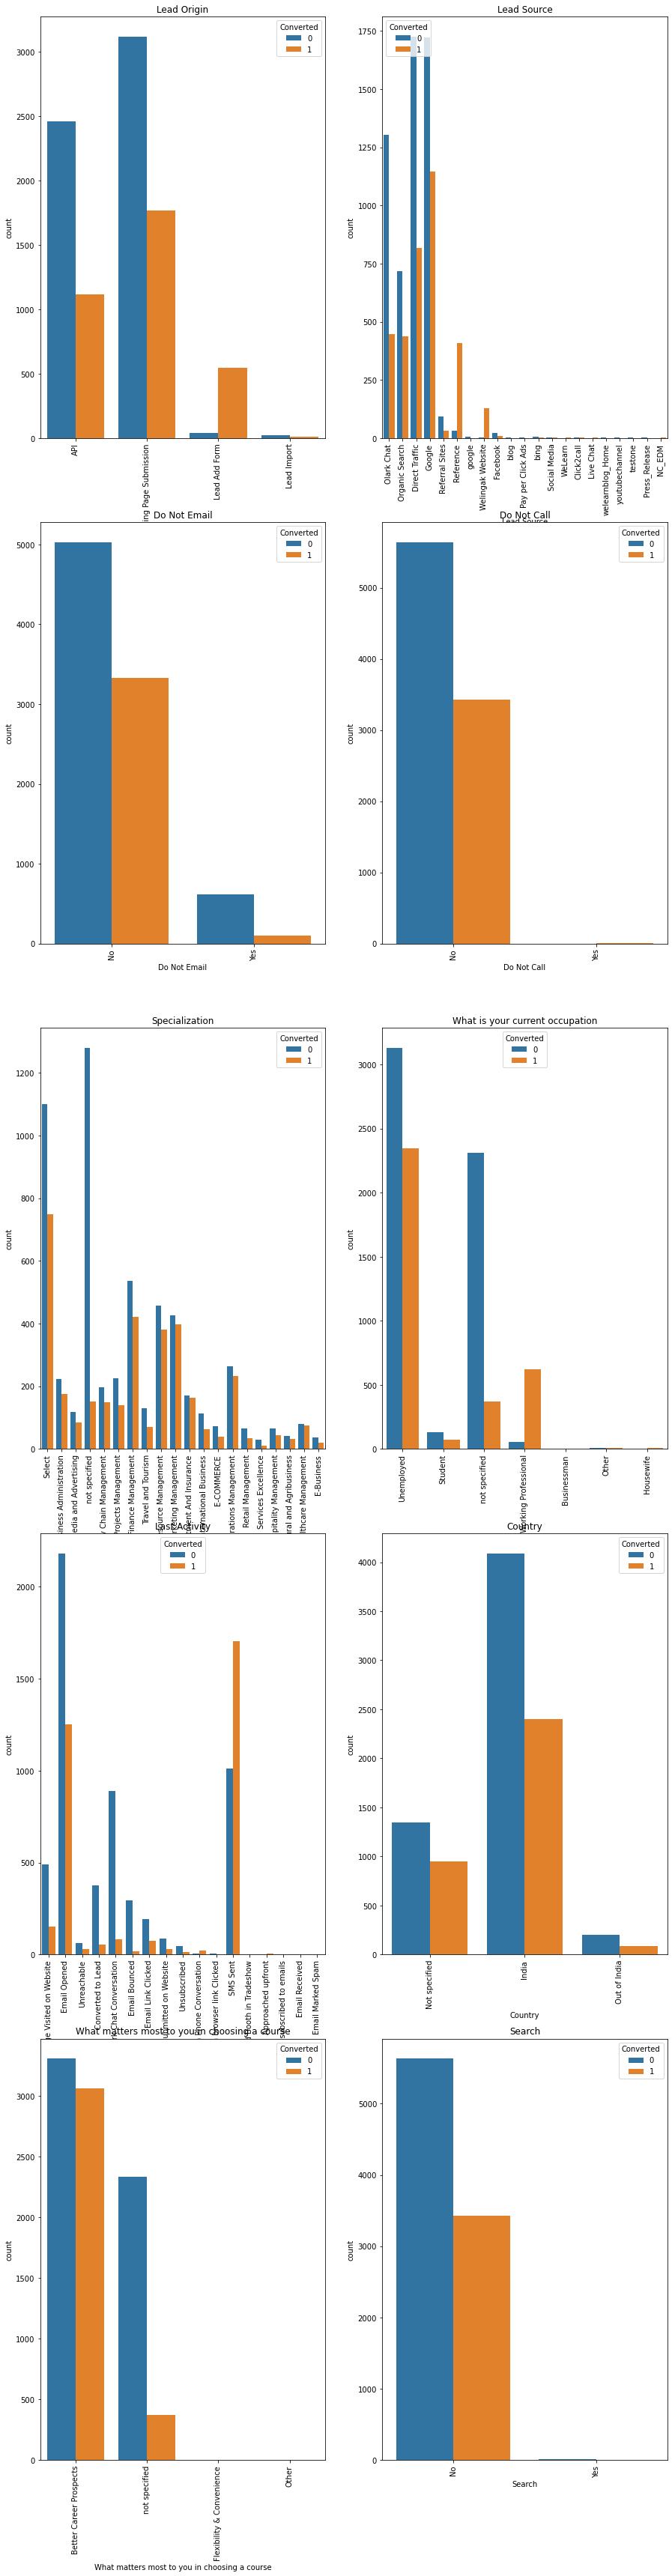

In [774]:
plt.figure(figsize = (15,60))

plt.subplot(5,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(5,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(5,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(5,2,5)
sns.countplot(x='Specialization', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(5,2,6)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(5,2,7)
sns.countplot(x='Last Activity', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(5,2,8)
sns.countplot(x='Country', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(5,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(5,2,10)
sns.countplot(x='Search', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

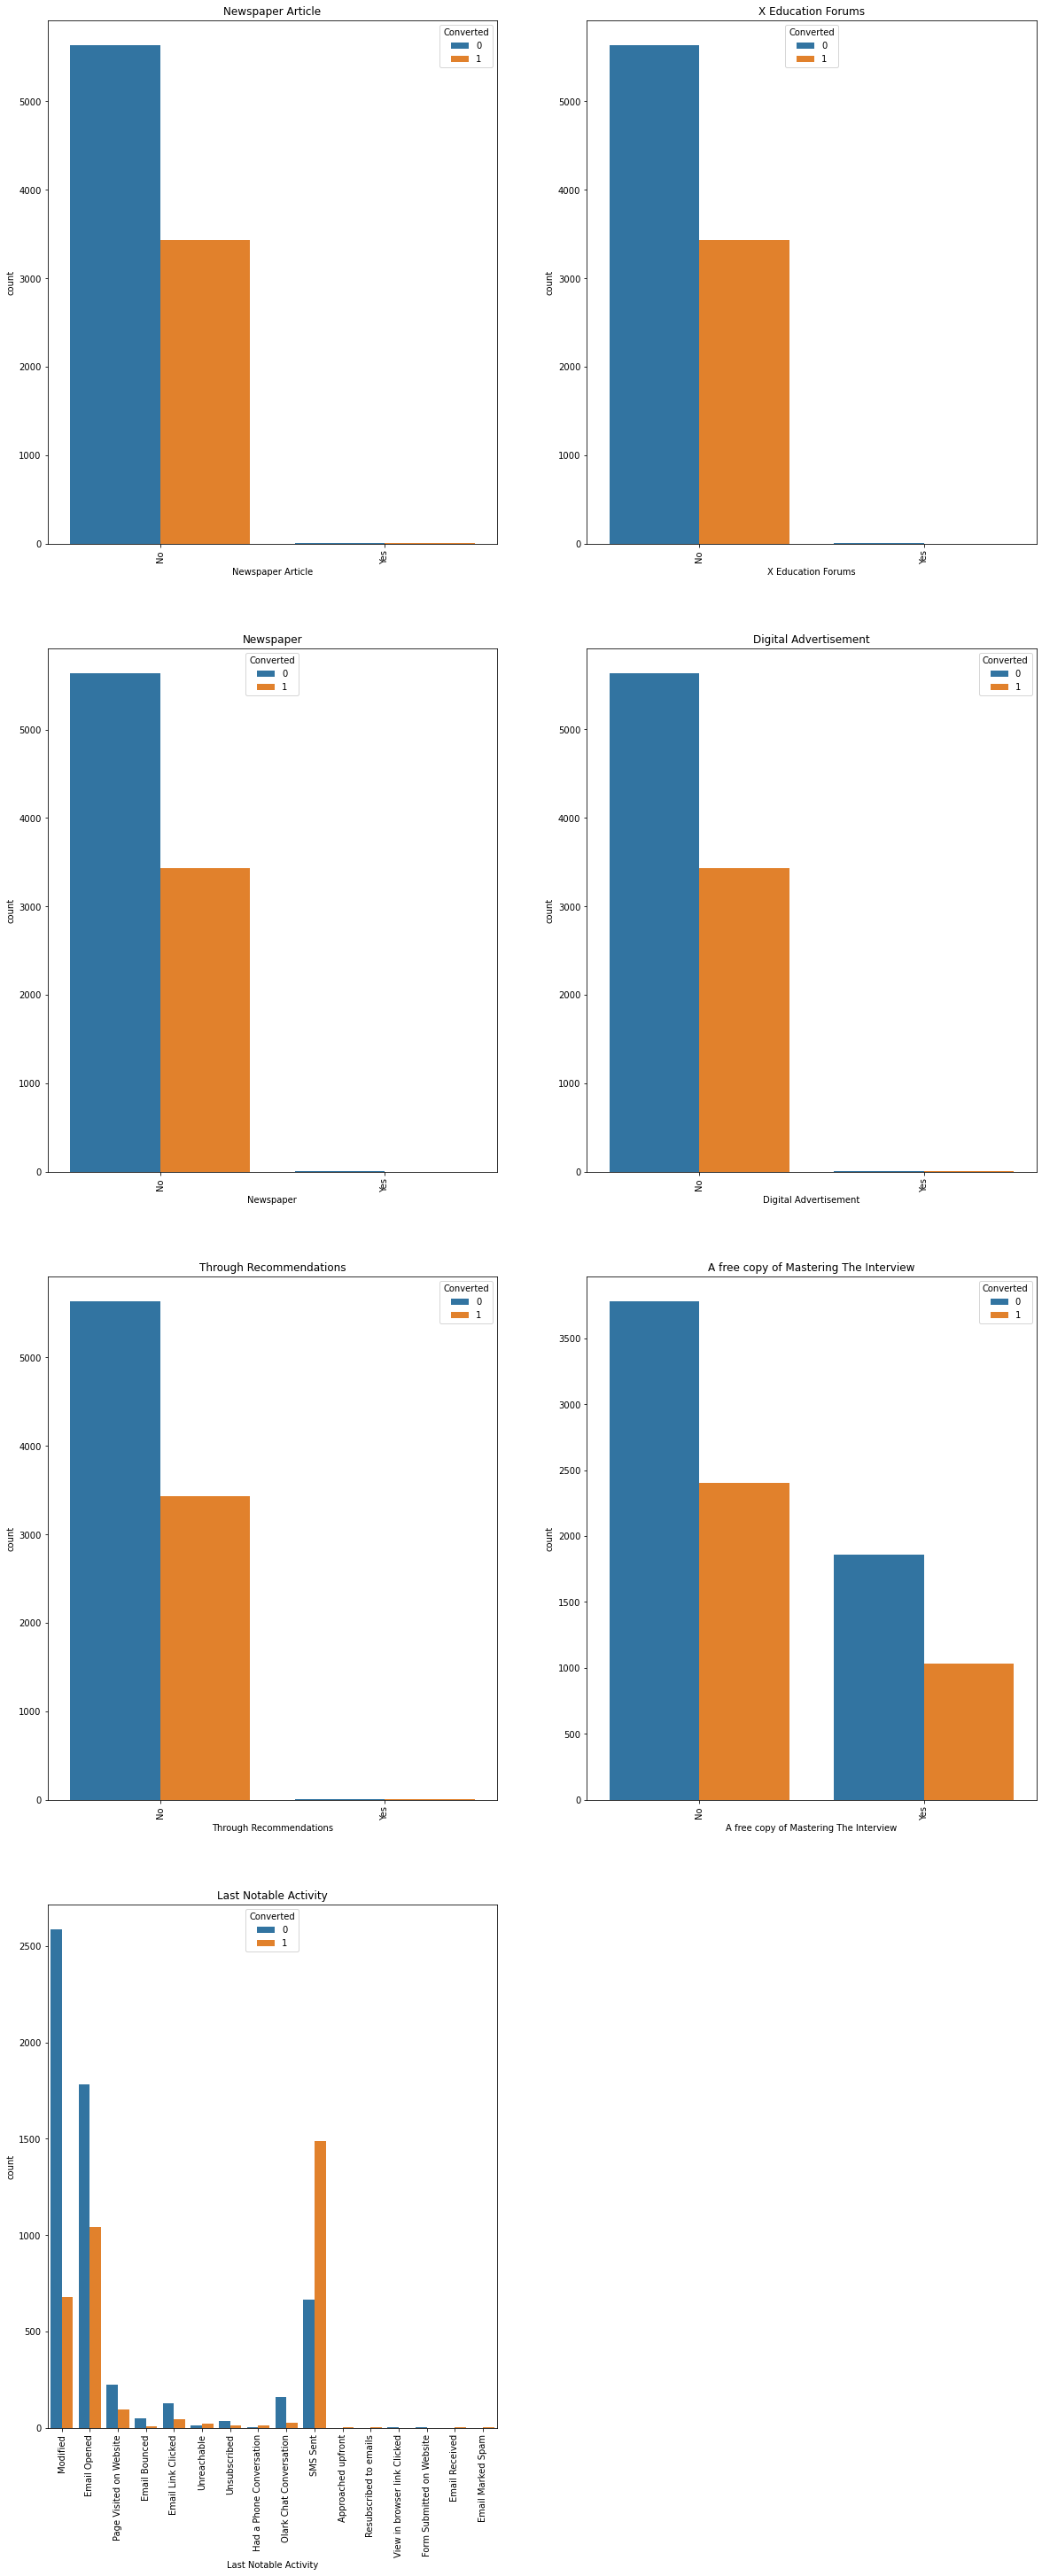

In [775]:
plt.figure(figsize = (20,50))

plt.subplot(4,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(4,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(4,2,3)
sns.countplot(x='Newspaper', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(4,2,4)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(4,2,5)
sns.countplot(x='Through Recommendations', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(4,2,6)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,7)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads1).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

# outlier analysis

In [776]:
OT_data = Leads1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
OT_data.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


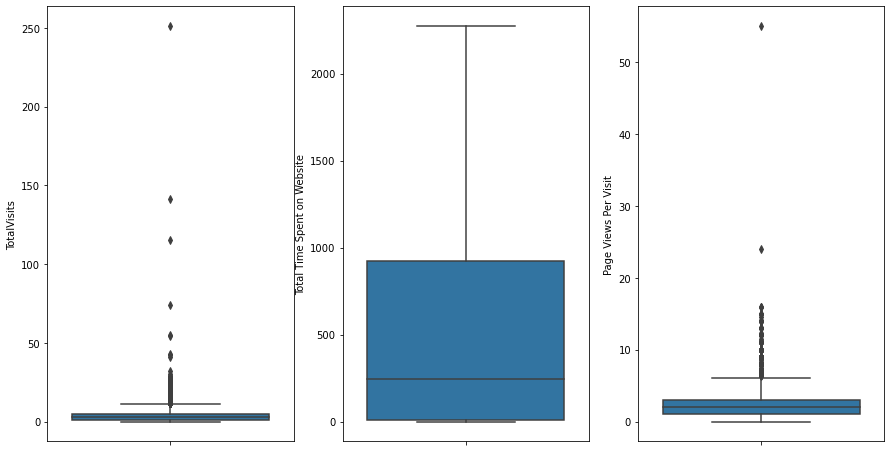

In [777]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.boxplot(y=Leads1['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(y=Leads1['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(y=Leads['Page Views Per Visit'])
plt.show()

In [778]:
# We can see outliers in TotalVisits

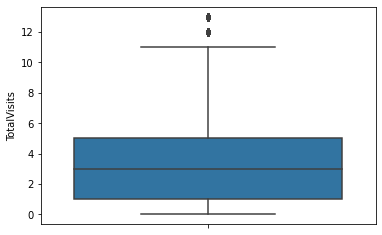

In [779]:
# Removing top & bottom 2% of the Column Outlier values
Q3 = Leads1.TotalVisits.quantile(0.98)
Leads1 = Leads1[(Leads1.TotalVisits <= Q3)]
Q1 = Leads1.TotalVisits.quantile(0.02)
Leads1 = Leads1[(Leads1.TotalVisits >= Q1)]
sns.boxplot(y=Leads1['TotalVisits'])
plt.show()

In [780]:
Leads1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not specified,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


## Dummy Variables

In [781]:
cat_colm= Leads1.select_dtypes(include=['object']).columns
cat_colm

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [782]:
New_dummy = pd.get_dummies(Leads1[['Lead Origin','Lead Source','Specialization','Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [783]:
# Addinf new dummy to the master dataframe
dummy = pd.concat([Leads1, New_dummy], axis=1)
dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Out of India,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [784]:
dummy = dummy.drop(['Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Test-Train split

In [785]:
 #Import the library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [786]:
X = dummy.drop('Converted', axis = 1)
y = dummy['Converted']

In [787]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

## Scaling

In [788]:
scaler = StandardScaler()

numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2912,-1.126650,-0.888299,-1.160478,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4316,2.148169,-0.016361,0.342181,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1812,2.512038,0.991131,3.848386,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7643,-0.762781,-0.468816,-0.659592,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4456,-0.398912,0.833596,-0.659592,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building

In [789]:
# Import logisticregression,RFE,sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [790]:
logreg = LogisticRegression()

In [791]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [792]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 42),
 ('Lead Source_testone', False, 34),
 ('Lead Source_welearnblog_Home', False, 43),


In [793]:
# Selected varaibles
colm = X_train.columns[rfe.support_]
colm

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Select',
       'Specialization_not specified', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not specified',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [794]:
X_train = X_train[colm]

In [795]:
X_train_sm = sm.add_constant(X_train[colm])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2493.5
Date:                Tue, 24 Jan 2023   Deviance:                       4987.1
Time:                        16:38:08   Pearson chi2:                 6.08e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4734      0.162     -2.922      0.003      -0.791      -0.156
Total Time Spent on Website                              1.1102      0.041     26.753      0.000       1.029       1.192
Lead Origin_Landing Page Submission                     -0.8804      0.130     -6.764      0.000      -1.136      -0.625
Lead Origin_Lead Add Form                                3.2031      0.246     13.015      0.000       2.721       3.685
Lead Source_Olark Chat                                   1.2870      0.126     10.190      0.000       1.039       1.535
Lead Source_Welingak Website                             3.0422      1.040      2.926      0.003       1.004       5.080
Specialization_Select                                   -0.8775      0.132     -6.661      0.000      -1.136      -0.619
Specialization_not specified                            -0.9510      0.191     -4.973      0.000      -1.326      -0.576
Do Not Email_Yes                                        -1.6122      0.210     -7.669      0.000      -2.024      -1.200
Last Activity_Email Opened                               0.3753      0.117      3.212      0.001       0.146       0.604
Last Activity_Had a Phone Conversation                   1.7467      0.843      2.071      0.038       0.094       3.400
Last Activity_Olark Chat Conversation                   -0.8309      0.193     -4.296      0.000      -1.210      -0.452
Last Activity_Resubscribed to emails                    23.7742   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                                   1.5119      0.119     12.757      0.000       1.280       1.744
What is your current occupation_Housewife               21.1015   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
What is your current occupation_Working Professional     2.3172      0.192     12.075      0.000       1.941       2.693
What is your current occupation_not specified           -1.0845      0.118     -9.220      0.000      -1.315      -0.854
Last Notable Activity_Had a Phone Conversation           1.6069      1.428      1.126      0.260      -1.191       4.405
Last Notable Activity_Modified                          -0.5408      0.090     -6.003      0.000      -0.717      -0.364
Last Notable Activity_Unreachable                        1.7952      0.537      3.341      0.001       0.742       2.848
Last Notable Activity_Unsubscribed                       1.4663      0.534      2.747      0.006       0.420       2.512
========================================================================================================================
"""

In [796]:
colm = colm.drop('Last Activity_Resubscribed to emails',1)
colm = colm.drop('What is your current occupation_Housewife',1)
colm = colm.drop('Last Notable Activity_Had a Phone Conversation',1)

In [797]:
X_train_sm = sm.add_constant(X_train[colm])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.3
Date:                Tue, 24 Jan 2023   Deviance:                       4996.7
Time:                        16:38:08   Pearson chi2:                 6.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4591      0.162     -2.841      0.004      -0.776      -0.142
Total Time Spent on Website                              1.1093      0.041     26.755      0.000       1.028       1.191
Lead Origin_Landing Page Submission                     -0.8807      0.130     -6.777      0.000      -1.135      -0.626
Lead Origin_Lead Add Form                                3.2173      0.246     13.082      0.000       2.735       3.699
Lead Source_Olark Chat                                   1.2931      0.126     10.245      0.000       1.046       1.541
Lead Source_Welingak Website                             3.0331      1.040      2.917      0.004       0.995       5.071
Specialization_Select                                   -0.8855      0.132     -6.729      0.000      -1.143      -0.628
Specialization_not specified                            -0.9479      0.191     -4.967      0.000      -1.322      -0.574
Do Not Email_Yes                                        -1.6162      0.210     -7.690      0.000      -2.028      -1.204
Last Activity_Email Opened                               0.3651      0.116      3.135      0.002       0.137       0.593
Last Activity_Had a Phone Conversation                   2.3936      0.647      3.700      0.000       1.126       3.661
Last Activity_Olark Chat Conversation                   -0.8413      0.193     -4.354      0.000      -1.220      -0.463
Last Activity_SMS Sent                                   1.4996      0.118     12.689      0.000       1.268       1.731
What is your current occupation_Working Professional     2.3134      0.192     12.055      0.000       1.937       2.690
What is your current occupation_not specified           -1.0838      0.117     -9.225      0.000      -1.314      -0.854
Last Notable Activity_Modified                          -0.5477      0.090     -6.104      0.000      -0.724      -0.372
Last Notable Activity_Unreachable                        1.7807      0.537      3.315      0.001       0.728       2.833
Last Notable Activity_Unsubscribed                       1.4559      0.534      2.729      0.006       0.410       2.502
========================================================================================================================
"""

### VIF

In [798]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [799]:
vif = pd.DataFrame()
vif['Features'] = X_train[colm].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm].values, i) for i in range(X_train[colm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.52
6,Specialization_not specified,3.23
13,What is your current occupation_not specified,2.89
8,Last Activity_Email Opened,2.70
11,Last Activity_SMS Sent,2.39
3,Lead Source_Olark Chat,2.26
5,Specialization_Select,2.01
14,Last Notable Activity_Modified,1.91
10,Last Activity_Olark Chat Conversation,1.85
2,Lead Origin_Lead Add Form,1.74


### As VIF looks good ,no need to drop any variables

In [800]:
# creating predictions

In [801]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.79384704, 0.28048232, 0.77891626, 0.03000213, 0.14822839,
       0.75583878, 0.90026936, 0.42609587, 0.02733031, 0.13968623])

In [802]:
y_train_pred_fin = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_fin.head()

,Converted,Conversion_Prob
0,1,0.793847
1,1,0.280482
2,1,0.778916
3,0,0.030002
4,0,0.148228


In [803]:
# Creating a new column Predicted with 1 if Probability > 0.5
y_train_pred_fin['Predicted'] = y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted
0,1,0.793847,1
1,1,0.280482,0
2,1,0.778916,1
3,0,0.030002,0
4,0,0.148228,0


### Evaluation

In [804]:
# Checking accuracy
print(metrics.accuracy_score(y_true= y_train_pred_fin.Converted, y_pred= y_train_pred_fin.Predicted))

0.8184590690208667


In [805]:
confusion = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Predicted )
confusion

array([[3433,  429],
       [ 702, 1666]], dtype=int64)

In [806]:
# Actual/Predicted     Not_Converted    Converted
# Not_Converted        3433             429
# Converted            702              1666 

In [807]:
# true positive 
TP = confusion[1,1] 
 # true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [808]:
sensitivity= TP / float(TP+FN)
sensitivity

0.7035472972972973

In [809]:
# senitivity is around 70%

In [810]:
specificity = TN/(TN+FP)
specificity

0.8889176592439151

In [811]:
# specificity is around 88%

In [812]:
# false positive rate
print(FP/ float(TN+FP))

0.11108234075608493


In [813]:
# positive predictive value 
print (TP / float(TP+FP))

0.7952267303102625


In [814]:
# Negative predictive value
print (TN / float(TN+ FN))

0.830229746070133


## Plotting ROC Curve

In [815]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [816]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob, drop_intermediate = False )

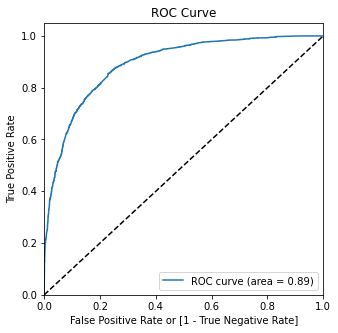

In [817]:
roc(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob)

In [818]:
# Value of ROC Curve is 0.89

In [819]:
## creating column with diffirent probabity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_fin[i]= y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.793847,1,1,1,1,1,1,1,1,1,0,0
1,1,0.280482,0,1,1,1,0,0,0,0,0,0,0
2,1,0.778916,1,1,1,1,1,1,1,1,1,0,0
3,0,0.030002,0,1,0,0,0,0,0,0,0,0,0
4,0,0.148228,0,1,1,0,0,0,0,0,0,0,0


In [820]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoff
Cutoffdata = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

In [821]:
# Import library
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Cutoffdata.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(Cutoffdata)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380096     1.000000     0.000000
0.1   0.1  0.643499     0.973818     0.440963
0.2   0.2  0.758427     0.918919     0.660021
0.3   0.3  0.795987     0.872466     0.749094
0.4   0.4  0.813644     0.773649     0.838167
0.5   0.5  0.818459     0.703547     0.888918
0.6   0.6  0.807865     0.629223     0.917400
0.7   0.7  0.784912     0.517736     0.948731
0.8   0.8  0.759872     0.414696     0.971517
0.9   0.9  0.716533     0.274493     0.987571


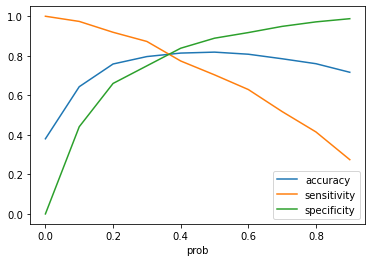

In [822]:
# ploting prob,accuracy,sentitivity,sepcificity
Cutoffdata.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the graph the optimal cutoff value is 0.35

In [823]:
y_train_pred_fin['Final_Predicted'] = y_train_pred_fin.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.793847,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.280482,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.778916,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.030002,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.148228,0,1,1,0,0,0,0,0,0,0,0,0


In [824]:
metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Final_Predicted)

0.7959871589085072

In [825]:
confusion = metrics.confusion_matrix(y_true= y_train_pred_fin.Converted, y_pred= y_train_pred_fin.Final_Predicted)
confusion

array([[2893,  969],
       [ 302, 2066]], dtype=int64)

In [826]:
# Actual/Predicted     Not_Converted    Converted
# Not_Converted        2893             969
# Converted            302              2066

In [827]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [828]:
# sensitivity
TP / float(TP+FN)

0.8724662162162162

In [829]:
# specificity
TN / float(TN+FP)

0.7490937338166753

In [830]:
## Precision and recall & precision recall
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [831]:
precision_score(y_train_pred_fin.Converted, y_train_pred_fin.Final_Predicted)

0.6807248764415157

In [832]:
recall_score(y_train_pred_fin.Converted, y_train_pred_fin.Final_Predicted)

0.8724662162162162

In [833]:
## with cutoff 0.35 we have precision around 68% and recall around 87%

In [834]:
p, r, thresholds = precision_recall_curve(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob)

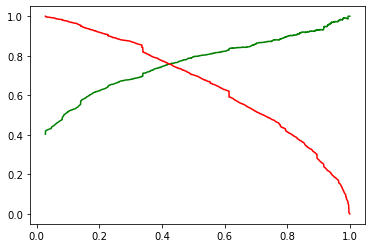

In [835]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on Test set

In [836]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [837]:
X_test = X_test[colm]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Select,Specialization_not specified,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_not specified,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5885,-0.888299,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
392,1.472895,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2193,-0.888299,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
560,1.652412,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5278,-0.888299,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [838]:
X_test_sm = sm.add_constant(X_test)

In [839]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

5885    0.027330
392     0.951328
2193    0.027330
560     0.954012
5278    0.081220
dtype: float64

In [840]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
5885,0.027330
392,0.951328
2193,0.027330
560,0.954012
5278,0.081220


In [841]:
# converting test to data frame
y_test_data = pd.DataFrame(y_test)

In [842]:
# using prospect to index
y_test_data['Prospect ID'] = y_test_data.index

In [843]:
y_pred1.reset_index(drop= True, inplace= True)
y_test_data.reset_index(drop= True, inplace= True)

In [844]:
y_pred_fin = pd.concat([y_test_data, y_pred1], axis = 1)
y_pred_fin.head()

,Converted,Prospect ID,0
0,0,5885,0.027330
1,1,392,0.951328
2,0,2193,0.027330
3,1,560,0.954012
4,0,5278,0.081220


In [845]:
# Renaming the column
y_pred_fin = y_pred_fin.rename(columns = {0: 'Converted_Prob'})

In [846]:
y_pred_fin = y_pred_fin[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_fin.head()

,Prospect ID,Converted,Converted_Prob
0,5885,0,0.027330
1,392,1,0.951328
2,2193,0,0.027330
3,560,1,0.954012
4,5278,0,0.081220


In [847]:
y_pred_fin['Final_Predicted'] = y_pred_fin.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_fin.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,5885,0,0.027330,0
1,392,1,0.951328,1
2,2193,0,0.027330,0
3,560,1,0.954012,1
4,5278,0,0.081220,0


In [848]:
# finding accuracy
metrics.accuracy_score(y_true= y_pred_fin.Converted, y_pred= y_pred_fin.Final_Predicted)

0.8134831460674158

In [849]:
confusion2 = metrics.confusion_matrix(y_true= y_pred_fin.Converted, y_pred= y_pred_fin.Final_Predicted)
confusion2

array([[1319,  360],
       [ 138,  853]], dtype=int64)

In [850]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [851]:
# sensitivity & Recall
TP / float(TP+FN)

0.8607467204843592

In [852]:
# specificity
TN / float(TN+FP)

0.7855866587254318

In [853]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.2144133412745682


In [854]:
# Positive predictive value & Precision
print (TP / float(TP+FP))

0.7032151690024732


In [855]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9052848318462594


### with cutoff 0.3 accuracy is 81%  precision is around 70% and recall around 86%

# Final Observation

  # Train Data:
## Accuracy   : 79%
## Sensitivity : 87 %
## Specificity : 74%
    
  # Test Data:
## Accuracy    : 81.3%
## Sensitivity : 86.0%
## Specificity : 78.5%